## Dimensionality Reduction Teachnique
### 1.Correlation Filtering:
* The Correlation of all columns with respects to all the columns and then find the pair of Highly correlated columns.
* We remove one of the highly correlated columns from the dataset to reduce the dimensionality of the dataset
### 2. Variance Inflation Filtering method:
* In this method we calculate the variance for all the independent variabels and after that we check the values of variance for all of the columns
* Finally we remove or eliminate all those columns from the dataset where the variance comes out to be less than or equal to 5.
### 3.Feature Selection:
* RFECV also known as Recursive Feature elimination with cross validation and the Boruta Algorithm
* It works along with the Random Forest Algorithm
### The most Advanced technique for dimensionality reduction are:
* Principal Component Analysis
* T-SNE
* Linear Discriminant Analysis
* These are nothing but meachine learning algorithm

In [1]:
# for Mathematical Operations
import numpy as np

# For DataFrame Operations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets Import the Dataset
data = pd.read_csv('Employee_Data.csv')

# lets check the shape of the dataset
data.shape

(1470, 35)

In [3]:
# lets check the Top 5 Rows of the Dataset

pd.set_option('max_columns', 35)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Lets find out all the Useless Columns

print("Number of Records in the Dataset :", data.shape[0])
print("Number of Unique Values in Employee Count Column :", data['EmployeeCount'].nunique())
print("Number of Unique Values in Employee Number Column :", data['EmployeeNumber'].nunique())
print("Number of Unique Values in Over 18 Column :", data['Over18'].nunique())
print("Number of Unique Values in Standard Hours Column :", data['StandardHours'].nunique())

Number of Records in the Dataset : 1470
Number of Unique Values in Employee Count Column : 1
Number of Unique Values in Employee Number Column : 1470
Number of Unique Values in Over 18 Column : 1
Number of Unique Values in Standard Hours Column : 1


* We can see that either these columns has all the values unique such as the Employee Number Column or these Columns has a Unique Value.
* These Kinds of Columns are useless for Predictive analysis as they do not have any Trends or Patterns Associated with them.
* Lets Drop these Columns from the Dataset

In [5]:
# Lets remove these Columns from the Dataset

data = data.drop(['EmployeeCount', 'EmployeeNumber',
                 'Over18', 'StandardHours'], axis = 1)

# lets check the Number of Columns after Removal of 4 columns from 35 Columns
print("Number of Columns Left in the Dataset after Removal of 4 Columns :", data.shape[1])

Number of Columns Left in the Dataset after Removal of 4 Columns : 31


In [6]:
# Lets check Missing Values
data.isnull().sum().sum()

0

In [7]:
# Lets check the Columns with Object Data Types
data.select_dtypes('object').head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [8]:
# Lets Encode these Object Data Types as Numerical Data Types

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

# lets again check whether there any Object Data Type Columns are Left
data.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [9]:
# lets split the Target Column Attrition from the Dataset

y = data['Attrition']
x = data.drop(['Attrition'], axis = 1)

# lets check the shape of the dataset
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1470, 30)
Shape of y:  (1470,)


In [10]:
## Lets Check the Attrition Column
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x, y)

# Making the Samples
x, y = sn.fit_resample(x, y)

# Class Distribution
y.value_counts()

Yes    838
No     640
Name: Attrition, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train.shape)
print("Shape of xtest: ", x_test.shape)
print("Shape of ytrain :", y_train.shape)
print("Shape of ytest :", y_test.shape)

Shape of xtrain:  (1182, 30)
Shape of xtest:  (296, 30)
Shape of ytrain : (1182,)
Shape of ytest : (296,)


In [13]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.78      0.89      0.83       121
         Yes       0.92      0.83      0.87       175

    accuracy                           0.85       296
   macro avg       0.85      0.86      0.85       296
weighted avg       0.86      0.85      0.86       296



### Correlation Filtering

* Remove Highly Correlated Features from the Data

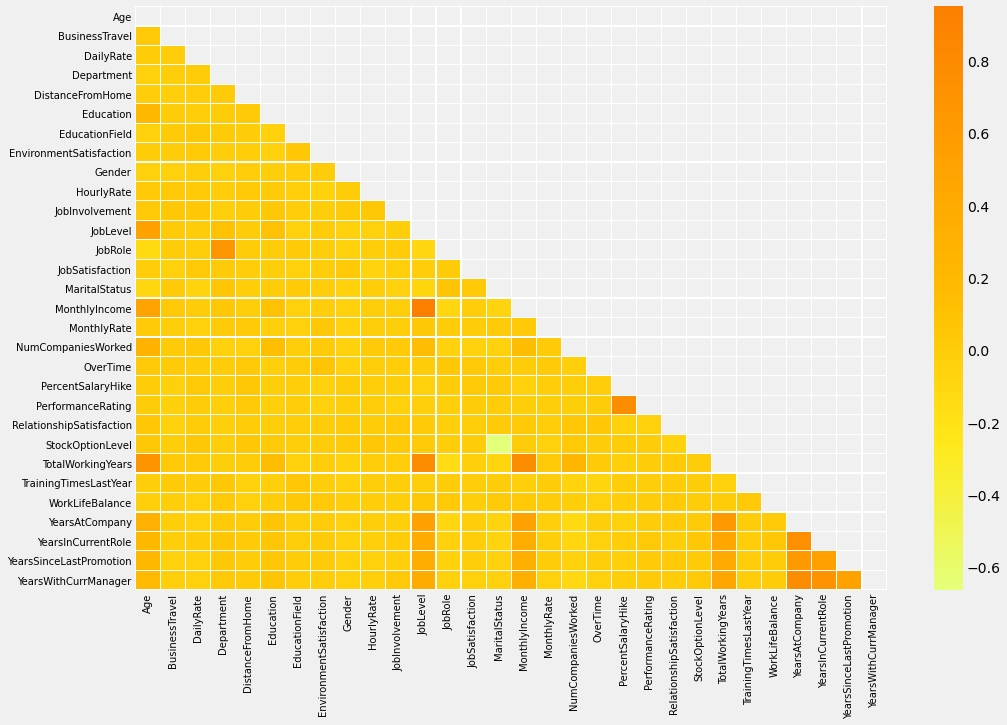

In [14]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, cmap = 'Wistia', linewidths = 0.2)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

* Age is Highly Correlated with Job Level, Monthly Income, and TotalWorking Years 
* Job Role and Department are Highly Correlated
* Job Level is Highly Correlated with TotalWorkingyears and MonthlyIncome
* Performance Rating and PercentSalaryHike are Highly Correlated
* YearsInCurrentRole is Highly Correlated with YearsAtCompany and YearsWithCurrManager

In [15]:
# Lets Remove the Highly Correlated Columns from the Datasets

data_cf = data.drop(['JobRole', 'JobLevel', 'PercentSalaryHike', 'TotalWorkingYears',
                     'YearsInCurrentRole', 'YearsWithCurrManager'], axis = 1)

# lets check the shape of the dataset after removal of 5 Columns from 35 Columns
data_cf.shape

(1470, 25)

In [16]:
# Lets Encode these Object Data Types as Numerical Data Types

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_cf['BusinessTravel'] = le.fit_transform(data_cf['BusinessTravel'])
data_cf['Department'] = le.fit_transform(data_cf['Department'])
data_cf['EducationField'] = le.fit_transform(data_cf['EducationField'])
data_cf['Gender'] = le.fit_transform(data_cf['Gender'])
data_cf['MaritalStatus'] = le.fit_transform(data_cf['MaritalStatus'])
data_cf['OverTime'] = le.fit_transform(data_cf['OverTime'])

# lets again check whether there any Object Data Type Columns are Left
data_cf.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [17]:
# Now, Split the Dataset

y_cf = data_cf['Attrition']
x_cf = data_cf.drop(['Attrition'], axis = 1)

In [18]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_cf, y_cf)

# Making the Samples
x_cf, y_cf = sn.fit_resample(x_cf, y_cf)

# Class Distribution
y_cf.value_counts()

Yes    838
No     641
Name: Attrition, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

x_train_cf, x_test_cf, y_train_cf, y_test_cf = train_test_split(x_cf, y_cf, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_cf.shape)
print("Shape of xtest: ", x_test_cf.shape)
print("Shape of ytrain :", y_train_cf.shape)
print("Shape of ytest :", y_test_cf.shape)

Shape of xtrain:  (1183, 24)
Shape of xtest:  (296, 24)
Shape of ytrain : (1183,)
Shape of ytest : (296,)


In [20]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_cf, y_train_cf)
y_pred_cf = model.predict(x_test_cf)

cr = classification_report(y_pred_cf, y_test_cf)
print(cr)

              precision    recall  f1-score   support

          No       0.79      0.88      0.83       122
         Yes       0.91      0.83      0.87       174

    accuracy                           0.85       296
   macro avg       0.85      0.86      0.85       296
weighted avg       0.86      0.85      0.85       296



### Variance Inflation Filtering

* Remove all the Features having High Variance
* VIF above 5 indicates a high multicollinearity. 

* VIF is a statistical technique which helps us to solve the problem of Multicolinearity 
* Multicolinarity is a problem which occures when there are two or more independent variabels

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
vif_data.style.background_gradient(cmap = 'Wistia')

,feature,VIF
0,Age,35.471068
1,BusinessTravel,6.936126
2,DailyRate,5.499722
3,Department,11.165526
4,DistanceFromHome,2.711344
5,Education,9.876365
6,EducationField,3.981095
7,EnvironmentSatisfaction,7.125041
8,Gender,2.173840
9,HourlyRate,13.550311


In [22]:
# lets create the Dependent and Non Dependent Sets
x_vif = data[['DistanceFromHome', 'EducationField', 'Gender', 'NumCompaniesWorked','OverTime',
           'StockOptionLevel','YearsSinceLastPromotion']]
y_vif = data['Attrition']

In [23]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_vif, y_vif)

# Making the Samples
x_vif, y_vif = sn.fit_resample(x_vif, y_vif)

# Class Distribution
y_vif.value_counts()

Yes    884
No     543
Name: Attrition, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y_vif, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_vif.shape)
print("Shape of xtest: ", x_test_vif.shape)
print("Shape of ytrain :", y_train_vif.shape)
print("Shape of ytest :", y_test_vif.shape)

Shape of xtrain:  (1141, 7)
Shape of xtest:  (286, 7)
Shape of ytrain : (1141,)
Shape of ytest : (286,)


In [25]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_vif, y_train_vif)
y_pred_vif = model.predict(x_test_vif)

cr = classification_report(y_pred_vif, y_test_vif)
print(cr)

              precision    recall  f1-score   support

          No       0.80      0.90      0.85       103
         Yes       0.94      0.87      0.91       183

    accuracy                           0.88       286
   macro avg       0.87      0.89      0.88       286
weighted avg       0.89      0.88      0.89       286



### Feature Selection with RFECV

* Recursive Elimination of Features from the Dataset to Reduce the Complexity
* RFE is a wrapper based Feature selection method
* RFE works by searching for a subset of feature by starting with all feature inhte trainning dataset and sucessfully removing features until the desired number remains
* Core of the model ranking features by importance discading the least important features and re-fitting the model
* Measure of variable importance is computed that ranks the predictors from most important to least
* The least important predictors are itertively eliminated prior to rebuilding the model
* Features are scored either using the provided machine learning model such as some Tree Based algorithm like decision tree or Random Forest which offers importance scores by using a stastical method

* Feature selection is the process which where we automatically or manually select those features which contribute most to our predictive model.
* Having irrelevent feature in the dataset can decrease the accuracy and efficency of the Predective models most of the time
* Heance feature selection method will help us select only the useful feature for Predective analysis

In [26]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = DecisionTreeClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 19
Best features : Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole'],
      dtype='object')


In [27]:
# lets Create the Dependent and Independent Sets for RFECV

x_rfecv = data[['JobLevel','MonthlyIncome','MonthlyRate']]
y_rfecv = data['Attrition']

In [28]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_rfecv, y_rfecv)

# Making the Samples
x_rfecv, y_rfecv = sn.fit_resample(x_rfecv, y_rfecv)

# Class Distribution
y_rfecv.value_counts()

Yes    646
No     603
Name: Attrition, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

x_train_rfecv, x_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(x_rfecv, y_rfecv,
                                                                            test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_rfecv.shape)
print("Shape of xtest: ", x_test_rfecv.shape)
print("Shape of ytrain :", y_train_rfecv.shape)
print("Shape of ytest :", y_test_rfecv.shape)

Shape of xtrain:  (999, 3)
Shape of xtest:  (250, 3)
Shape of ytrain : (999,)
Shape of ytest : (250,)


In [30]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_rfecv, y_train_rfecv)
y_pred_rfecv = model.predict(x_test_rfecv)

cr = classification_report(y_pred_rfecv, y_test_rfecv)
print(cr)

              precision    recall  f1-score   support

          No       0.91      0.89      0.90       118
         Yes       0.90      0.92      0.91       132

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



### Feature Selection using the Boruta Algorithm

* In Boruta, features do not compete among themselves. Instead — and this is the first brilliant idea — they compete with a randomized version of them.

* Boruta is a feature selection algorithm which is statically grounded
### First Idea : Shadow the features
* It means that the features do not compete among themselves
* insted they compete wiht a randomized version of them
* Another dataframe is created by randomly shuffling each feature 
* These permuted features are called shadow features which are attached to the original data frame which has twice the number of columns as compared as compared to the original DataSet,After the data set created
* The feture importance for each of the original feature is caliculated and compared with a threshold
* The threshold is defdined as the highest feature importance recorded among the shadow feature
* When the improve of a feature is higher than this threshold then that feature is considered to be an important Feature for the Predctive model

### Second Idea : Key is Iteration
* According to the second idea the key is iteration
* Not suprising,20 trails are more realiable than 1 trail and 100 trails are more reliable than 20 trails
* The number of oteration can be Tuned as per the requirment but in general 100 iteration are considered to be Optimal for most of the Cases

In [31]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Implementing the Boruta Algorithm
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# defining the Model
model= RandomForestClassifier(max_depth = 5)

# define Boruta feature selection method
boruta = BorutaPy(estimator = model, n_estimators = 'auto',
                  max_iter = 100, random_state = 0)

# find all relevant features
boruta.fit(np.array(x), np.array(y))

### print results
best_features = x.columns[boruta.support_].to_list()
print('features to Keep:', best_features)

features to Keep: ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [33]:
# lets Create the Dependent and Independent Sets for RFECV

x_bor = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction',
                'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y_bor = data['Attrition']

In [34]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_bor, y_bor)

# Making the Samples
x_bor, y_bor = sn.fit_resample(x_bor, y_bor)

# Class Distribution
y_bor.value_counts()

Yes    838
No     640
Name: Attrition, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

x_train_bor, x_test_bor, y_train_bor, y_test_bor = train_test_split(x_bor, y_bor,
                                                                            test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_bor.shape)
print("Shape of xtest: ", x_test_bor.shape)
print("Shape of ytrain :", y_train_bor.shape)
print("Shape of ytest :", y_test_bor.shape)

Shape of xtrain:  (1182, 22)
Shape of xtest:  (296, 22)
Shape of ytrain : (1182,)
Shape of ytest : (296,)


In [36]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_bor, y_train_bor)
y_pred_bor = model.predict(x_test_bor)

cr = classification_report(y_pred_bor, y_test_bor)
print(cr)

              precision    recall  f1-score   support

          No       0.79      0.85      0.82       128
         Yes       0.88      0.83      0.85       168

    accuracy                           0.84       296
   macro avg       0.83      0.84      0.84       296
weighted avg       0.84      0.84      0.84       296



## To Reduce High Dimenonality Reduction
* They are 

### 1.Principal Component Analysis
* The principal components of a collection of points in a real p-space that are a sequence of p direction vectors, where the ith vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors.
* High Dimensionality means that the dataset has a large number of features 
* The problem with high-dimensionality in the meachine learing number field is modeling overfitting
* It reduces the ability of machine learning models to generalize beyond the examples in the training set

### Algorith of PCA:
* The following Steps
* 1. Normalise the data
* we normlise the data so that PCA works properly
* 2. Create a Covariance matrix
* we compute the covariance matrix of the whole dataset
* 3. Caliculate eigenvalues and eigenvectors
* we calculate the eigenvalues and eigenvectors of the covariens matrix
* 4.Choosing Component and forming a feature vector:
* we order the eigenvalues from largest to smallest so that it gives us the components in order of significance
* If we have 'n' eigen values and we have ;n; eigen vectors Eigen vectors coressponds to highest eigenvalue is the PCA of the dataset
* 5.Forming Principal Components:
* This is the final step where we actually from principal component we take the transpose of the feature vector and multiply it with the transpose of the scaled version of the original dataset

* The PCA are orthogonal they are not corelated each other

In [37]:
# lets determine the Value of N-Components
from sklearn.decomposition import PCA

# Lets create the PCA Model
pca = PCA(n_components = None)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# This result the variance explained by the number of components taken into account
pca.explained_variance_ratio_.cumsum()

array([0.7284166 , 0.99802283, 0.99999208, 0.99999692, 0.99999791,
       0.99999875, 0.99999927, 0.99999944, 0.99999958, 0.99999966,
       0.99999972, 0.99999978, 0.99999982, 0.99999986, 0.99999988,
       0.9999999 , 0.99999992, 0.99999993, 0.99999995, 0.99999996,
       0.99999997, 0.99999998, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ])

In [38]:
from sklearn.decomposition import PCA

# Lets create the PCA Model
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [39]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_pca, y_train)
y_pred_pca = model.predict(x_test_pca)

cr = classification_report(y_pred_pca, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       132
         Yes       0.91      0.88      0.89       164

    accuracy                           0.89       296
   macro avg       0.88      0.89      0.88       296
weighted avg       0.89      0.89      0.89       296



In [40]:
# lets check How these Components will look

df = pd.DataFrame({'x_train_pca0':x_train_pca[:,0],
                 'x_train_pca1':x_train_pca[:,1],
                 'Attrition':y_train})
df.head()

,x_train_pca0,x_train_pca1,Attrition
1444,8699.529505,-3202.976502,Yes
1470,-1477.377907,-2781.027754,Yes
56,-8311.474393,13756.033216,No
1005,5964.857436,-2913.159831,Yes
467,6418.357134,5675.848243,No


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


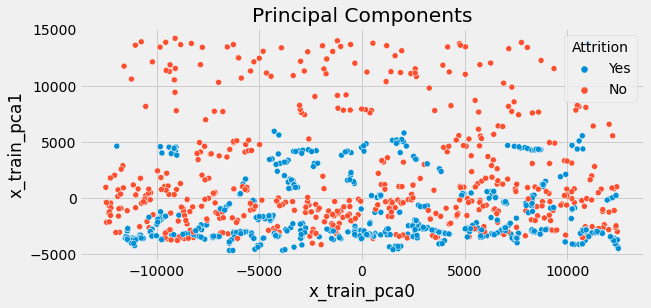

In [41]:
# lets plot the Principal Components

plt.rcParams['figure.figsize'] = (9, 4)
plt.style.use('fivethirtyeight')

sns.scatterplot(df['x_train_pca0'], df['x_train_pca1'],
                hue = df['Attrition'])
plt.title('Principal Components')
plt.show()

### 2.t-SNE: To reduse the high dimensionality reduction
* t-distributed stochastic neighbor embedding is a machine learning algorithm for visualization based on Stochastic Neighbor Embedding originally developed by Sam Roweis and Geoffrey Hinton, where Laurens van der Maaten proposed the t-distributed variant.
* t-sne is a meachine learning teachnique for dimensionality reduction that helps you to identify relevent pattrens
* The main advantage of t-sne is the ability to represent local structure 
* It means roughly,the point which are close to one another in the high-dimensional data set will tend to be close to one another in the chart
* t-sne also produces beatiful looking visualization

## Setting Up Predective Model
* To understand the data although scanning raw data and caliculating basic statics csn lead to some insights nothing beats a chart 
* Fitting multiple dimensions of data into simple chart is always a challenge
* Where t-sne (or.t-distribution stochastic neighbour embedding for long)
* Conclude that T_SNE is most preferable used for Visualising High Dimensiona DataSet in simple Charts

## Working of the T-SNE Model
* t-sne algorthim models the probability distribution of neighbours around each point
* The term neighbours refers to the set of point which are closese to each point
* in the original high-dimnensional space this is modeled as a Gaussian distribution
* The goal of the proceded is to find a mapping onto the 2-dimensional space minimize the diffrence b/w these two dostribution over all points
* The fatter tails of a t-distribution compared to a Gaussian helps to spread the points moe evenly in 2-dimensional space
* The main Parameter controlling the fitting is called perplexity
* PrePlexity is roghly equivalently to the no of nearest neighbours considered when matching and fitted distribution for each point
* A low perplexity means we can care about local scale and focus on the closer other high perplexity takes more of a 'big picture approac'

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
x_train_tsne = pca.fit_transform(x_train)
x_test_tsne = pca.transform(x_test)

In [43]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_tsne, y_train)
y_pred_tsne = model.predict(x_test_tsne)

cr = classification_report(y_pred_tsne, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.84      0.90      0.87       129
         Yes       0.92      0.87      0.89       167

    accuracy                           0.88       296
   macro avg       0.88      0.88      0.88       296
weighted avg       0.88      0.88      0.88       296



### Linear Discriminant Analysis
* a technique that is used to reduce a large number of variables into fewer numbers of factors. The values of observed data are expressed as functions of a number of possible causes in order to find which are the most important.

* The main main goal of dimensionality reduction teachnique is reduce the dimensional by removing the reductant and dependent features by transforming the features from higher dimensional space to a space with lower dimension
### Note:PCA was an unsupervised teachnique while LDA is a supervervised teachnique

## LDA Steps:
* 1. Caliculate the sperability bw diffrent classes i,e the distance bw the mean of diffrent classes also called as the between -class variance
* 2. Caliculate the distance bw the mean and sample of each class which is called the within-class variance
* 3. Compute the eigenvalues and corresponding eigenvectors for the scatter matrices
* 4. Sort the eigenvalues and select the top k
* 5. Create a new matrix containg eigenvectors that map to the K eigen values
* 6. Obtain the newfeatures i,e LDA component by taking the dot prodct of the matrix from the previous steps

In [44]:
# Implementing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lets define the Model
lda = LDA(n_components = None)
x_lda = lda.fit_transform(x_train, y_train)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

In [45]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

# lets run the function
select_n_components(lda_var_ratios, 0.95)

1

In [46]:
# lets define the Model
lda = LDA(n_components = 1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [47]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_lda, y_train)
y_pred_lda = model.predict(x_test_lda)

cr = classification_report(y_pred_lda, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.74      0.76      0.75       135
         Yes       0.79      0.78      0.78       161

    accuracy                           0.77       296
   macro avg       0.77      0.77      0.77       296
weighted avg       0.77      0.77      0.77       296

